# **Data Analysis**

# **데이터 확인**

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import os, sys, json
import folium
import math
import random

# read excel file
df = pd.read_csv('./data/seoul_echarge.csv')
df_cctv = pd.read_csv('./data/Seoul_cctv1.csv', encoding='cp949')
df_park = pd.read_csv('./data/Seoul_hotel1.csv', encoding='cp949')
df_hotel = pd.read_csv('./data/Seoul_park1.csv', encoding='cp949')

In [5]:
df_hotel

,Unnamed: 0,공원명,지역,위도,경도
0,0,남산도시자연공원,중구,37.550140,126.990377
1,1,길동생태공원,강동구,37.540394,127.154779
2,2,서울대공원,과천시,37.426449,127.019846
3,3,서울숲,성동구,37.543072,127.041798
4,4,월드컵공원,마포구,37.571805,126.878907
...,...,...,...,...,...
126,126,서일대뒷산공원,중랑구,37.587716,127.098782
127,127,용마도시자연공원(사가정공원),중랑구,37.579762,127.095997
128,128,문화비축기지,마포구,37.571718,126.893246
129,129,경춘선숲길,NaN,37.627077,127.076482


# **데이터 전처리**

In [6]:
df_echarge = df.filter(regex='(충전소명|위도|경도)')
df_echarge = df_echarge.dropna(axis=0)
df_echarge

,충전소명,위도,경도
0,진원종합관리주식회사,37.622001,127.086575
1,창동역 환승주차장,37.654368,127.049129
2,창1동 공영주차장,37.647129,127.037189
3,조원동 공영주차장,37.481022,126.905712
4,서울대정문 옆 구거부지 급속충전소,37.466421,126.948761
...,...,...,...
612,강남구청 부설주차장,37.517966,127.047061
613,헌릉로745길 공영노상주차장,37.470314,127.118638
614,압구정로29길 공영노상주차장,37.530846,127.027139
615,논현로22길 공영노외주차장,37.482026,127.048422


# **데이터 시각화**

In [7]:
df_EV = deepcopy(df_echarge)

df_EV["nbr_cctv_idx"] = [[]]*df_EV.shape[0]
df_EV["nbr_park_idx"] = [[]]*df_EV.shape[0]
df_EV["nbr_hotel_idx"] = [[]]*df_EV.shape[0]

/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packa

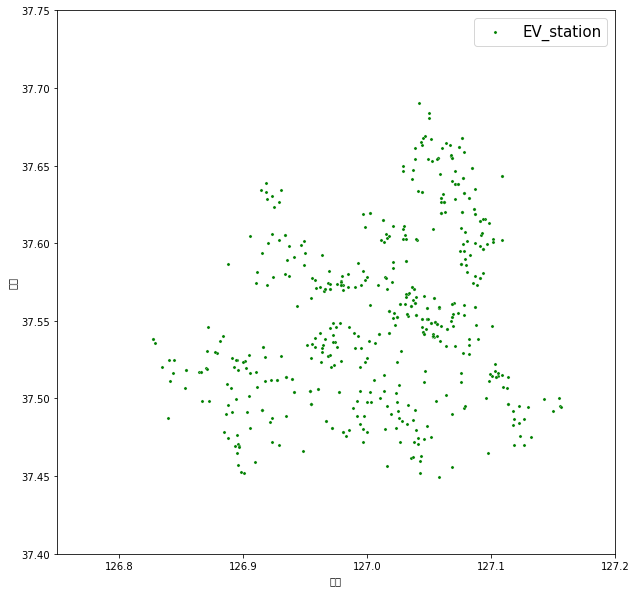

In [8]:
fig, ax = plt.subplots(figsize =(10,10))

plt.xlim(126.75, 127.2)
plt.ylim(37.4, 37.75)

xy = sns.scatterplot(df_echarge['경도'], df_echarge['위도'], label= 'EV_station', s=10, color='g')

plt.plot()

plt.legend(fontsize='15', markerscale=1)

/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packa

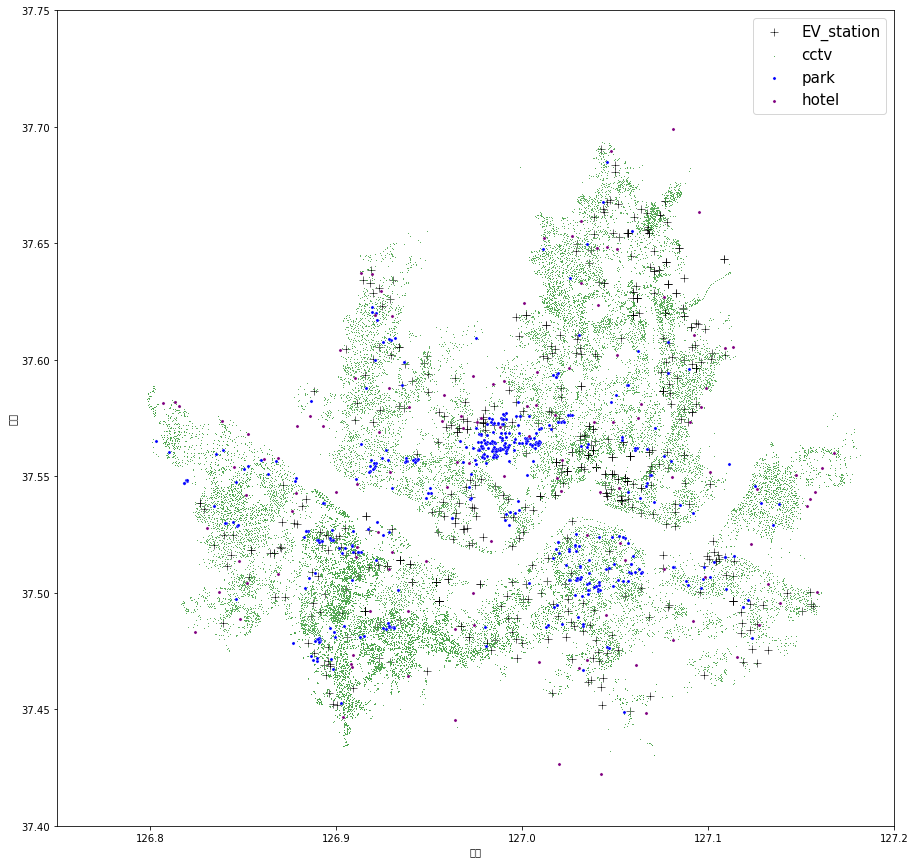

In [9]:
fig, ax = plt.subplots(figsize =(15,15))

plt.xlim(126.75, 127.2)
plt.ylim(37.4, 37.75)

echarge_all = sns.scatterplot(df_EV['경도'], df_EV['위도'], label= 'EV_station', s=50,  color="black", marker="+")
cctv_all = sns.scatterplot(df_cctv['경도'], df_cctv['위도'], label= 'cctv', s=1, color='green')
park_all = sns.scatterplot(df_park['경도'], df_park['위도'], label= 'park', s=10, color='blue')
hotel_all = sns.scatterplot(df_hotel['경도'], df_hotel['위도'], label= 'hotel', s=10, color='purple')


plt.plot()

plt.legend(fontsize='15', markerscale=1)

/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg

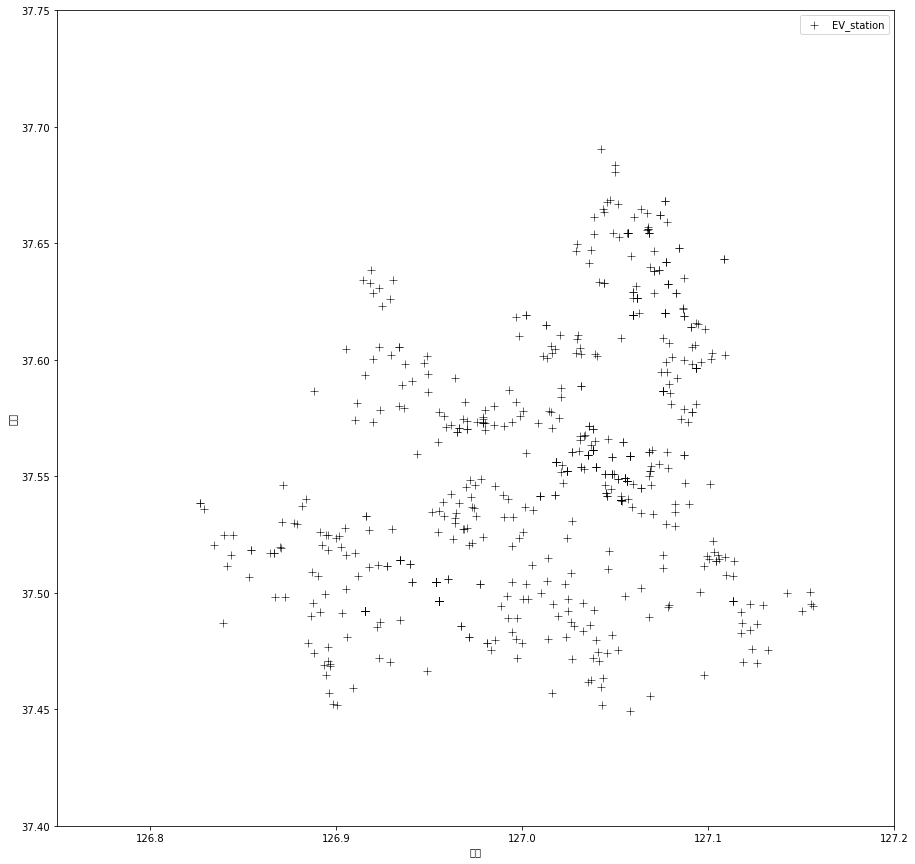

In [10]:
def show_EV():

  fig, ax = plt.subplots(figsize =(15,15))


  plt.xlim(126.75, 127.2)
  plt.ylim(37.4, 37.75)

  echarge_all = sns.scatterplot(df_EV['경도'], df_EV['위도'], label= 'EV_station', s=50,  color="black", marker="+")
  plt.show()

show_EV()

/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 mi

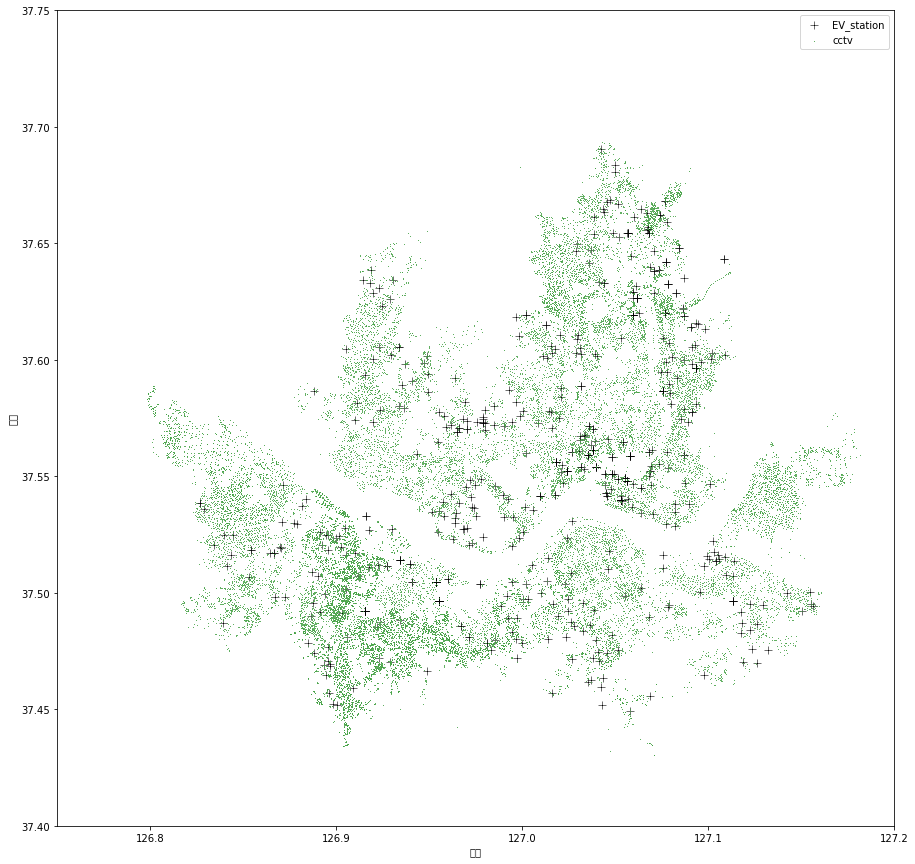

In [11]:
def show_CCTV():

  fig, ax = plt.subplots(figsize =(15,15))


  plt.xlim(126.75, 127.2)
  plt.ylim(37.4, 37.75)

  echarge_all = sns.scatterplot(df_EV['경도'], df_EV['위도'], label= 'EV_station', s=50,  color="black", marker="+")
  cctv_all = sns.scatterplot(df_cctv['경도'], df_cctv['위도'], label= 'cctv', s=1, color='green')
  plt.show()

show_CCTV()

/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

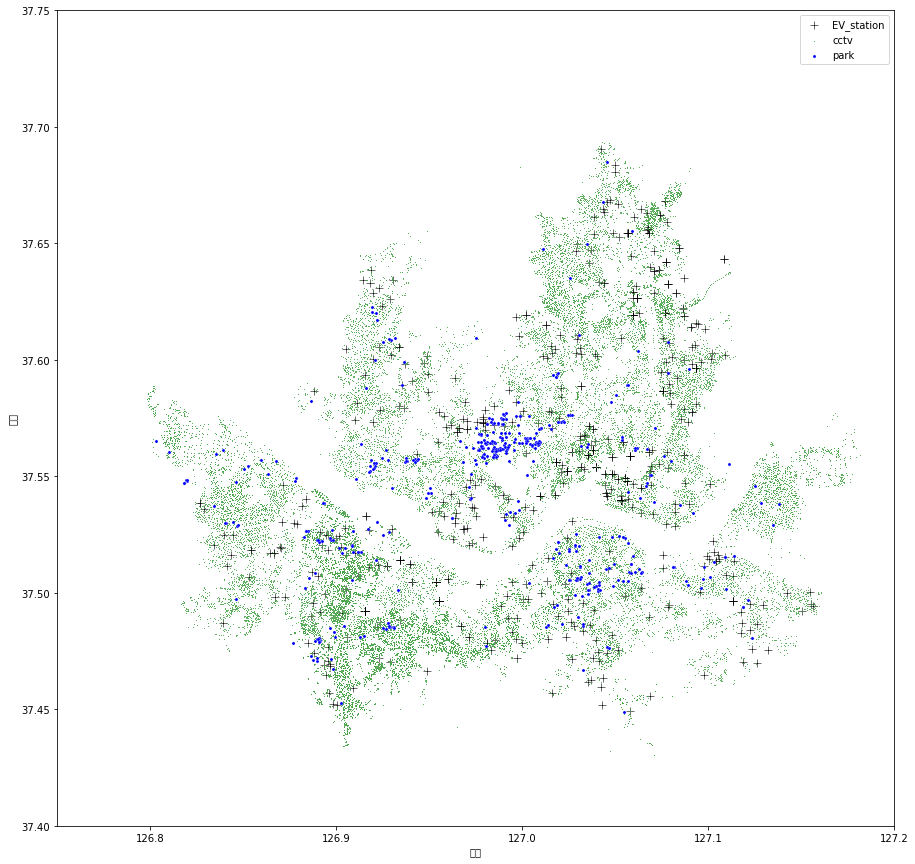

In [12]:
def show_park():
  fig, ax = plt.subplots(figsize =(15,15))

  plt.xlim(126.75, 127.2)
  plt.ylim(37.4, 37.75)

  echarge_all = sns.scatterplot(df_EV['경도'], df_EV['위도'], label= 'EV_station', s=50,  color="black", marker="+")
  cctv_all = sns.scatterplot(df_cctv['경도'], df_cctv['위도'], label= 'cctv', s=1, color='green')
  park_all = sns.scatterplot(df_park['경도'], df_park['위도'], label= 'park', s=10, color='blue')
  plt.show()

show_park()

/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

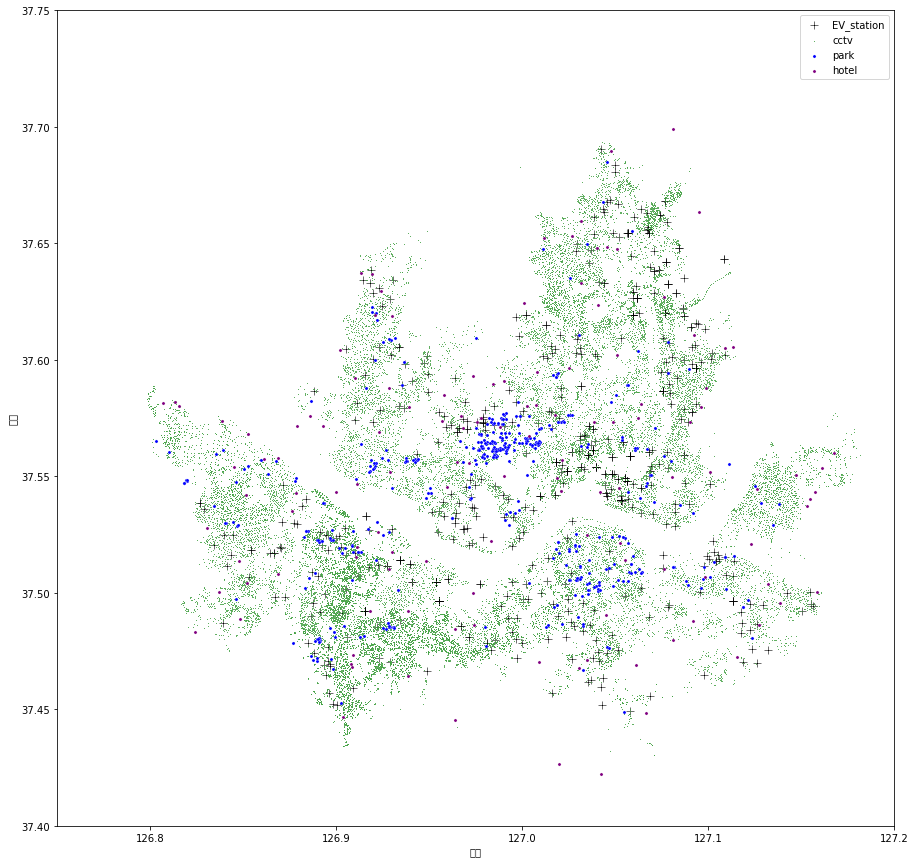

In [13]:
def show_hotel():
  fig, ax = plt.subplots(figsize =(15,15))

  plt.xlim(126.75, 127.2)
  plt.ylim(37.4, 37.75)

  echarge_all = sns.scatterplot(df_EV['경도'], df_EV['위도'], label= 'EV_station', s=50,  color="black", marker="+")
  cctv_all = sns.scatterplot(df_cctv['경도'], df_cctv['위도'], label= 'cctv', s=1, color='green')
  park_all = sns.scatterplot(df_park['경도'], df_park['위도'], label= 'park', s=10, color='blue')
  hotel_all = sns.scatterplot(df_hotel['경도'], df_hotel['위도'], label= 'hotel', s=10, color='purple')
  plt.show()

show_hotel()

# **지도 img 넣기(진행 중)**

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


TypeError: ignored

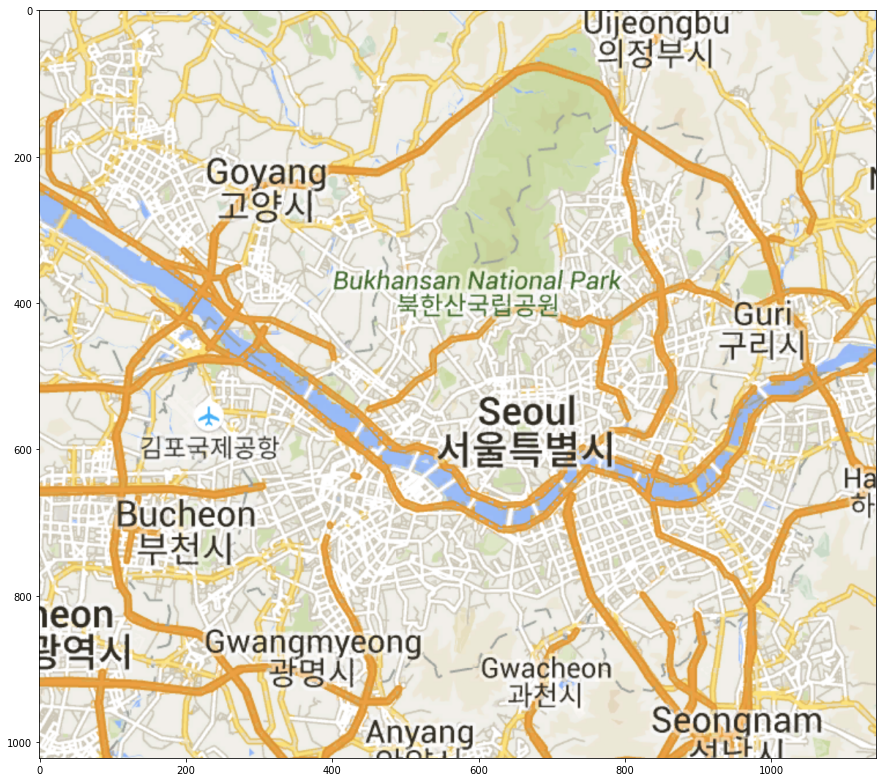

In [11]:
%pylab notebook
import cv2
import tensorflow as tf
import dlib
# !pip install pytesseract
import pytesseract as ptess
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline


img = mpimg.imread('./image/seoul_map.png')

fig, ax = plt.subplots(figsize =(15,15))

ax.imshow(img)

#plt.xlim(126.75, 127.2)
#plt.ylim(37.4, 37.75)

ax.set_xticks(126.75, 127.2)
ax.set_yticks(37.4, 37.75)

echarge_all = sns.scatterplot(df_EV['경도'], df_EV['위도'], label= 'EV_station', s=50,  color="black", marker="+")
cctv_all = sns.scatterplot(df_cctv['경도'], df_cctv['위도'], label= 'cctv', s=1, color='green')
park_all = sns.scatterplot(df_park['경도'], df_park['위도'], label= 'park', s=10, color='blue')
hotel_all = sns.scatterplot(df_hotel['경도'], df_hotel['위도'], label= 'hotel', s=10, color='purple')

plt.show()

# **CCTV**

In [14]:
def find_nbr_cctv(rad):

  for idx in range(len(df_EV)):

    df_tmp = df_cctv.loc[abs(df_cctv['위도'] - df_EV['위도'].at[idx]) < rad].loc[abs(df_cctv['경도'] - df_EV['경도'].at[idx]) < rad]
        
    NBR_idx = df_tmp.index.tolist()

    df_EV["nbr_cctv_idx"].at[idx] = NBR_idx

  return df_EV


In [15]:
find_nbr_cctv(0.01)

,충전소명,위도,경도,nbr_cctv_idx,nbr_park_idx,nbr_hotel_idx
0,진원종합관리주식회사,37.622001,127.086575,"[75, 79, 86, 92, 96, 122, 147, 169, 196, 219, ...",[],[]
1,창동역 환승주차장,37.654368,127.049129,"[18856, 18857, 18858, 18859, 18861, 18862, 188...",[],[]
2,창1동 공영주차장,37.647129,127.037189,"[18841, 18842, 18843, 18845, 18846, 18847, 188...",[],[]
3,조원동 공영주차장,37.481022,126.905712,"[4243, 4244, 4245, 4307, 4308, 4309, 4311, 431...",[],[]
4,서울대정문 옆 구거부지 급속충전소,37.466421,126.948761,"[25522, 25529, 25531, 25547, 25555, 25562, 255...",[],[]
...,...,...,...,...,...,...
612,강남구청 부설주차장,37.517966,127.047061,"[34962, 34965, 34968, 34978, 34980, 34983, 349...",[],[]
613,헌릉로745길 공영노상주차장,37.470314,127.118638,"[8857, 8861, 8862, 8863, 9107, 9108, 9121, 970...",[],[]
614,압구정로29길 공영노상주차장,37.530846,127.027139,"[11317, 14438, 14439, 34958, 34982, 35021, 351...",[],[]
615,논현로22길 공영노외주차장,37.482026,127.048422,"[12415, 12424, 12425, 12427, 12428, 12445, 128...",[],[]


# **공원**

In [16]:
def find_nbr_park(rad):

  for idx in range(len(df_EV)):

    df_tmp = df_park.loc[abs(df_park['위도'] - df_EV['위도'].at[idx]) < rad].loc[abs(df_park['경도'] - df_EV['경도'].at[idx]) < rad]
        
    NBR_idx = df_tmp.index.tolist()

    df_EV["nbr_park_idx"].at[idx] = NBR_idx

  return df_EV


In [17]:
find_nbr_park(0.01)

,충전소명,위도,경도,nbr_cctv_idx,nbr_park_idx,nbr_hotel_idx
0,진원종합관리주식회사,37.622001,127.086575,"[75, 79, 86, 92, 96, 122, 147, 169, 196, 219, ...",[],[]
1,창동역 환승주차장,37.654368,127.049129,"[18856, 18857, 18858, 18859, 18861, 18862, 188...",[],[]
2,창1동 공영주차장,37.647129,127.037189,"[18841, 18842, 18843, 18845, 18846, 18847, 188...",[212],[]
3,조원동 공영주차장,37.481022,126.905712,"[4243, 4244, 4245, 4307, 4308, 4309, 4311, 431...","[271, 302, 317, 318, 319, 327, 399]",[]
4,서울대정문 옆 구거부지 급속충전소,37.466421,126.948761,"[25522, 25529, 25531, 25547, 25555, 25562, 255...",[],[]
...,...,...,...,...,...,...
612,강남구청 부설주차장,37.517966,127.047061,"[34962, 34965, 34968, 34978, 34980, 34983, 349...","[9, 43, 57, 61, 63, 64, 65, 84, 331]",[]
613,헌릉로745길 공영노상주차장,37.470314,127.118638,"[8857, 8861, 8862, 8863, 9107, 9108, 9121, 970...",[],[]
614,압구정로29길 공영노상주차장,37.530846,127.027139,"[11317, 14438, 14439, 34958, 34982, 35021, 351...","[56, 334, 340]",[]
615,논현로22길 공영노외주차장,37.482026,127.048422,"[12415, 12424, 12425, 12427, 12428, 12445, 128...","[10, 41]",[]


# **호텔**

In [18]:
def find_nbr_hotel(rad):

  for idx in range(len(df_EV)):

    df_tmp = df_hotel.loc[abs(df_hotel['위도'] - df_EV['위도'].at[idx]) < rad].loc[abs(df_hotel['경도'] - df_EV['경도'].at[idx]) < rad]
        
    NBR_idx = df_tmp.index.tolist()

    df_EV["nbr_hotel_idx"].at[idx] = NBR_idx

  return df_EV

In [19]:
find_nbr_hotel(0.01)

,충전소명,위도,경도,nbr_cctv_idx,nbr_park_idx,nbr_hotel_idx
0,진원종합관리주식회사,37.622001,127.086575,"[75, 79, 86, 92, 96, 122, 147, 169, 196, 219, ...",[],[]
1,창동역 환승주차장,37.654368,127.049129,"[18856, 18857, 18858, 18859, 18861, 18862, 188...",[],"[47, 98, 108]"
2,창1동 공영주차장,37.647129,127.037189,"[18841, 18842, 18843, 18845, 18846, 18847, 188...",[212],"[47, 108]"
3,조원동 공영주차장,37.481022,126.905712,"[4243, 4244, 4245, 4307, 4308, 4309, 4311, 431...","[271, 302, 317, 318, 319, 327, 399]",[96]
4,서울대정문 옆 구거부지 급속충전소,37.466421,126.948761,"[25522, 25529, 25531, 25547, 25555, 25562, 255...",[],[]
...,...,...,...,...,...,...
612,강남구청 부설주차장,37.517966,127.047061,"[34962, 34965, 34968, 34978, 34980, 34983, 349...","[9, 43, 57, 61, 63, 64, 65, 84, 331]","[63, 121]"
613,헌릉로745길 공영노상주차장,37.470314,127.118638,"[8857, 8861, 8862, 8863, 9107, 9108, 9121, 970...",[],[130]
614,압구정로29길 공영노상주차장,37.530846,127.027139,"[11317, 14438, 14439, 34958, 34982, 35021, 351...","[56, 334, 340]",[45]
615,논현로22길 공영노외주차장,37.482026,127.048422,"[12415, 12424, 12425, 12427, 12428, 12445, 128...","[10, 41]",[44]


# **파일 내보내기(무시해도 됩니다)**

In [ ]:
df_EV.to_csv('df_EV.csv', encoding="utf-8-sig")

# **전기차 충전소 nkm 레이더**

In [20]:
df_EV

,충전소명,위도,경도,nbr_cctv_idx,nbr_park_idx,nbr_hotel_idx
0,진원종합관리주식회사,37.622001,127.086575,"[75, 79, 86, 92, 96, 122, 147, 169, 196, 219, ...",[],[]
1,창동역 환승주차장,37.654368,127.049129,"[18856, 18857, 18858, 18859, 18861, 18862, 188...",[],"[47, 98, 108]"
2,창1동 공영주차장,37.647129,127.037189,"[18841, 18842, 18843, 18845, 18846, 18847, 188...",[212],"[47, 108]"
3,조원동 공영주차장,37.481022,126.905712,"[4243, 4244, 4245, 4307, 4308, 4309, 4311, 431...","[271, 302, 317, 318, 319, 327, 399]",[96]
4,서울대정문 옆 구거부지 급속충전소,37.466421,126.948761,"[25522, 25529, 25531, 25547, 25555, 25562, 255...",[],[]
...,...,...,...,...,...,...
612,강남구청 부설주차장,37.517966,127.047061,"[34962, 34965, 34968, 34978, 34980, 34983, 349...","[9, 43, 57, 61, 63, 64, 65, 84, 331]","[63, 121]"
613,헌릉로745길 공영노상주차장,37.470314,127.118638,"[8857, 8861, 8862, 8863, 9107, 9108, 9121, 970...",[],[130]
614,압구정로29길 공영노상주차장,37.530846,127.027139,"[11317, 14438, 14439, 34958, 34982, 35021, 351...","[56, 334, 340]",[45]
615,논현로22길 공영노외주차장,37.482026,127.048422,"[12415, 12424, 12425, 12427, 12428, 12445, 128...","[10, 41]",[44]


In [21]:
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jieunson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

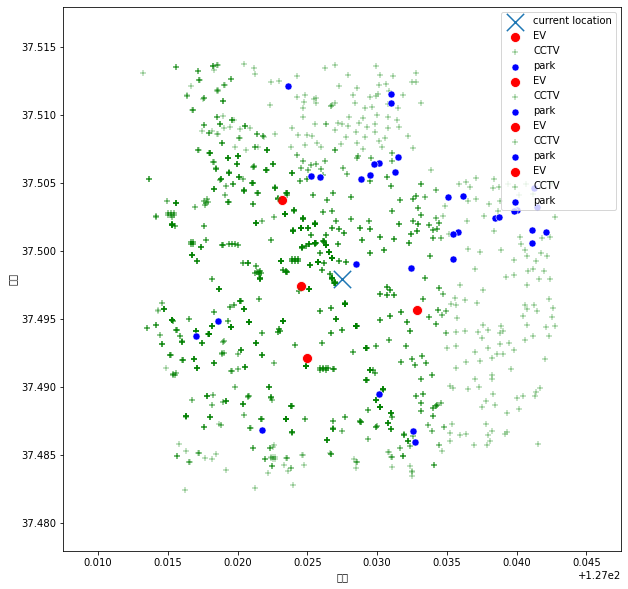

In [23]:
from matplotlib import font_manager, rc
def radar_show(km, curr_long, curr_lat):

  font_path = './data/malgun.ttf'
  font_name = font_manager.FontProperties(fname=font_path).get_name()
  rc('font', family=font_name)

  rad = 0.008 * km                             # 사용자 지정
  df_nbr = df_EV.loc[abs(df_EV['위도'] - curr_long) < rad].loc[abs(df_EV['경도'] - curr_lat) < rad]

  fig, ax = plt.subplots(figsize =(10,10))

  plt.xlim(curr_lat - 0.02, curr_lat + 0.02)
  plt.ylim(curr_long - 0.02, curr_long + 0.02)
  plt.scatter(curr_lat, curr_long, label= 'current location', s=300, marker = 'x')

  for i in df_nbr.index:
    echarge_rdr = sns.scatterplot(df_nbr['경도'], df_nbr['위도'], label= 'EV', s=100,  color="red")
    cctv_rdr = sns.scatterplot(df_cctv.loc(axis=0)[df_nbr.loc[i, 'nbr_cctv_idx']]['경도'], df_cctv.loc(axis=0)[df_nbr.loc[i, 'nbr_cctv_idx']]['위도'], label= 'CCTV', s=30,  color="green", marker="+")
    park_rdr = sns.scatterplot(df_park.loc(axis=0)[df_nbr.loc[i, 'nbr_park_idx']]['경도'], df_park.loc(axis=0)[df_nbr.loc[i, 'nbr_park_idx']]['위도'], label= 'park', s=50,  color="blue")
    hotel_rdr = sns.scatterplot(df_hotel.loc(axis=0)[df_nbr.loc[i, 'nbr_hotel_idx']]['경도'], df_hotel.loc(axis=0)[df_nbr.loc[i, 'nbr_hotel_idx']]['위도'], label= 'hotel', s=50,  color="purple")

    #ax.annotate('hi', (37.4703,	127.1186))
    #ax.annotate('txt', xy=(df_nbr['경도'], df_nbr['위도']), xytext=(df_nbr['경도']-0.05, df_nbr['위도']-0.3),
    #  arrowprops = dict(  arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
  plt.show()

radar_show(1, 37.49793309224927, 127.02751219923572)